# Compressing a Grayscale Image via Singular Value Decomposition (SVD)

Materials for Methods 2: Digital Systems, Week 4: **Digital Images x Data Science**.   
Author: Jasper Shuoyang Zheng

## Step 1 - Load an Image

Load libraries

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

Load the image using PIL.Image, convert to grayscale and display

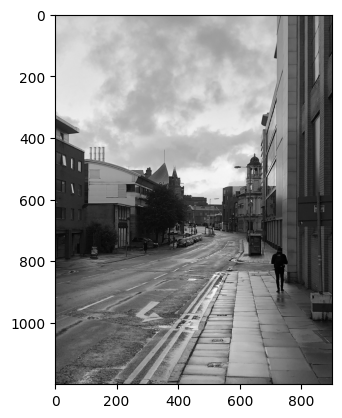

In [ ]:
img = Image.open('img.jpg').convert('L')
plt.imshow(img, cmap='gray')
plt.show()

Covert the image into a [NumPy](https://numpy.org/doc/stable/reference/generated/numpy.array.html) matrix

In [ ]:
img_matrix = np.array(img)
img_matrix.shape

(1200, 900)

## Step 2 - Run SVD on the Data Matrix

In [ ]:
U, sigma, V = np.linalg.svd(img_matrix)

In [ ]:
print(f'Left-singular vectors U: {U.shape}')
print(f'Singular values Sigma: {sigma.shape}')
print(f'Right-singular vectors V: {V.shape}')

Left-singular vectors U: (1200, 1200)
Singular values Sigma: (900,)
Right-singular vectors V: (900, 900)


## Step 3 - Compress and Reconstruct the Matrix

Thus, the first few left-singular vectors and right-singular vectors represent the most prominent information (the **Principal Components**) of the image

**Compress U**

In [ ]:
U_comp_1 = np.matrix(U[:, :1])
U_comp_1.shape

(1200, 1)

**Compress Sigma**

In [ ]:
sigma_comp_1 = np.diag(sigma[:1])
sigma_comp_1.shape

(1, 1)

**Compress V**

In [ ]:
V_comp_1 = np.matrix(V[:1, :])
V_comp_1.shape

(1, 900)

**Reconstruct the Image**

In [ ]:
reconstion_1 = U_comp_1 * sigma_comp_1 * V_comp_1
reconstion_1.shape

(1200, 900)

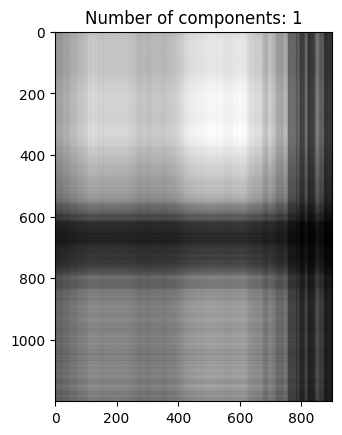

In [ ]:
plt.imshow(reconstion_1, cmap='gray')
plt.title(f'Number of components: 1')
plt.show()

## Step 4 - Test Different Numbers of Components

In [ ]:
components = [2, 4, 8, 16, 32, 64]

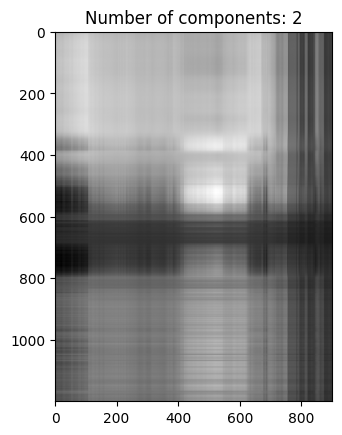

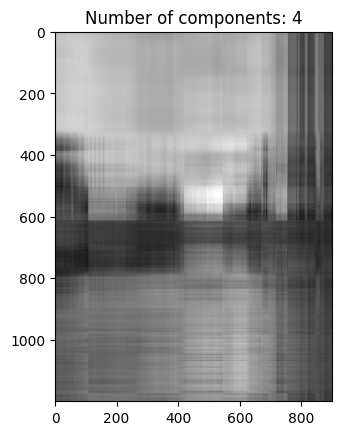

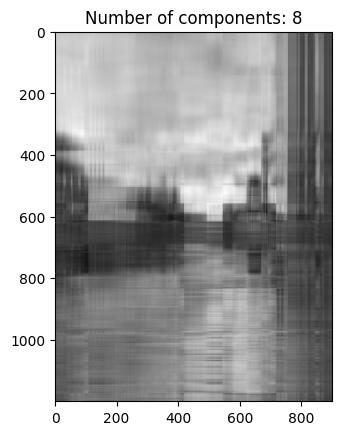

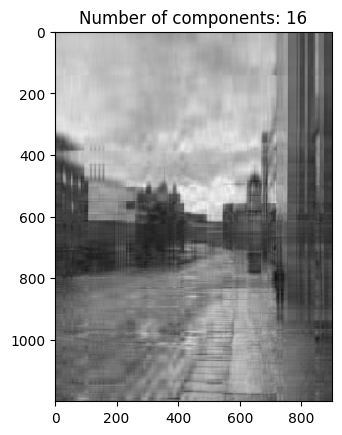

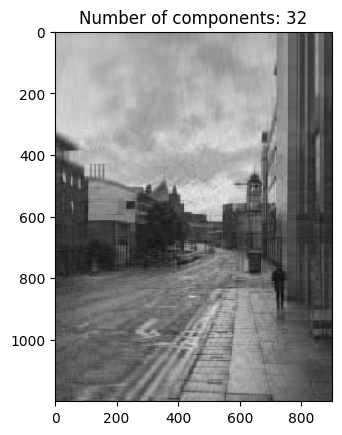

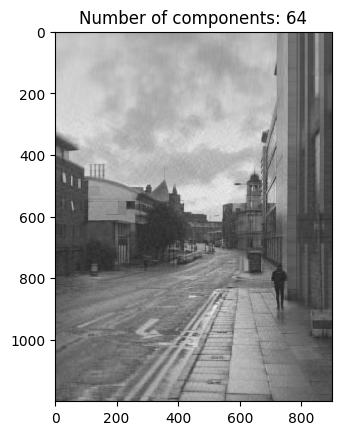

In [ ]:
for c in components:
  U_comp = np.matrix(U[:, :c])
  sigma_comp = np.diag(sigma[:c])
  V_comp = np.matrix(V[:c, :])
  reconstion = U_comp * sigma_comp * V_comp
  plt.imshow(reconstion, cmap='gray')
  plt.title(f'Number of components: {c}')
  plt.show()

In [ ]:
1200*64+64+900*64

134464

In [ ]:
1080000/134464

8.031889576392194